In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv(r"C:\Users\mishr\Desktop\Naresh i\17th - ML\17th - ML\TITANIC PROJECT\DATASET\titanic dataset.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Changing the Male and Female string values to numeric values 1 and 2 respectively.

def getnumbers(str):
    if str == 'male':
        return 1 
    else:
        return 2
titanic["Gender"] = titanic["Sex"].apply(getnumbers)   #Here we created a new column named 'Gender' and fill the respective values.     

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
#Calculating the mean age of survived people

mean_s = titanic[titanic.Survived == 1].Age.mean()
mean_s

28.343689655172415

In [9]:
# Creating a new column named 'age' and filling the null vales from our 'Age' column with the mean of survived people.

titanic['age'] = np.where(pd.isnull(titanic.Age) & titanic['Survived']==1,mean_s,titanic['Age'])

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
age            125
dtype: int64

In [12]:
mean_ns = titanic[titanic.Survived == 0].Age.mean()
mean_ns

30.62617924528302

In [13]:
titanic.age.fillna(mean_ns,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
age              0
dtype: int64

In [15]:
#Finding the number of people who have survived in terms of Embarked or Boarded from a particular spot.

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


In [16]:
#Finding the number of people who did not survived in terms of Embarked or Boarded from a particular spot.

ns_survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
ns_survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
ns_survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(ns_survivedQ)
print(ns_survivedC)
print(ns_survivedS)

47
75
427


In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
age              0
dtype: int64

In [18]:
# As we filled the null values in the new columns that we created. 
# So we can easily delete the older and unnecessary Columns.
# Preventing to affect out data.

del titanic['Fare']
del titanic['Cabin']
del titanic['Age']
del titanic['Sex']

titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Embarked,Gender,age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,S,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,S,2,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,S,1,35.0


In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
SibSp          0
Parch          0
Ticket         0
Embarked       2
Gender         0
age            0
dtype: int64

In [20]:
# As there are significane change in Embarked column so we can't delete the entire column.
# As there are very less null values present so we can easily drop the null values instead.
# It will not create a significance impact on our dataset

titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Embarked,Gender,age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,S,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,S,2,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,S,1,35.0


In [21]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Gender         0
age            0
dtype: int64

In [22]:
# Renaming 'age' and 'gender' to its original frame.

titanic.rename(columns = {'age':'Age'},inplace = True)
titanic.rename(columns = {'Gender':'Sex'},inplace = True)

titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Embarked,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,S,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,S,2,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,S,1,35.0


In [23]:
# Changing the categorica value to Numerical value.

def getEmb(str):
    if str == 'S':
        return 1
    elif str == 'Q':
        return 2
    else:
        return 3
titanic['Embark']=titanic['Embarked'].apply(getEmb)

titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Embarked,Sex,Age,Embark
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,S,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C,2,38.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,S,2,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,S,2,35.0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,S,1,35.0,1


In [24]:
# As we don't need the older column any further.

del titanic['Embarked']

In [25]:
titanic.rename(columns={'Embark':'Embarked'},inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,2,38.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,2,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,2,35.0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,1,35.0,1


577
312


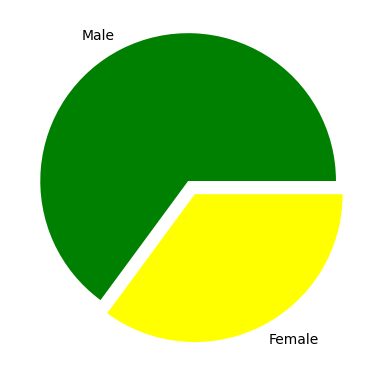

In [26]:
males = (titanic['Sex'] == 1).sum()

females = (titanic['Sex'] == 2).sum()

print(males)
print(females)
p = [males,females]

plt.pie(p,
       labels = ['Male','Female'],
       colors = ['green','yellow'],
       explode = (0.10,0))

plt.show()

In [27]:
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


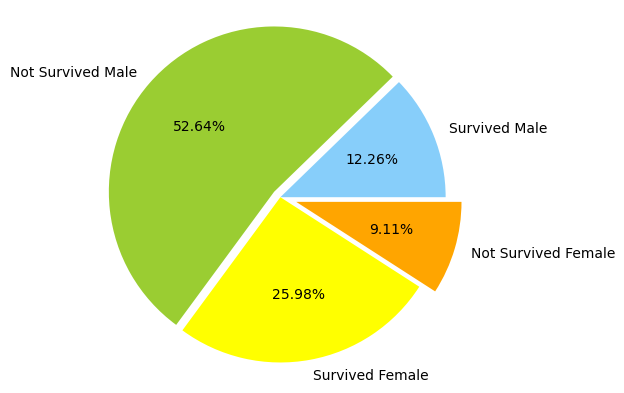

In [28]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,autopct="%.2f%%")
plt.axis("equal")
plt.show()